# Capturing greenhouse gases with data

## Model Development

### by Zachary Brown

Now that my dataset has been cleaned, explored, and preprocessed, it's time to begin testing a range of models to determine which can best predict the volumetric CO2 working capacity and then explore which features boost that capacity the most.

I'll start by installing the necessary libraries and then importing everything we'll need.

In [1]:
!pip install xgboost==1.7.4
!pip install lightgbm==3.3.5

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn import linear_model
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost
from sklearn import tree
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
from matplotlib import rcParams

In [3]:
sns.set_theme('notebook')
rcParams['mathtext.default'] = 'regular'

Let's start by importing the training data.

In [4]:
X_train = pd.read_csv('../data/processed/X_train.csv', index_col = 'filename')
y_train = pd.read_csv('../data/processed/y_train.csv', index_col = 0)

In [5]:
X_train.head()

,unit_cell_volume,Density,accessible_surface_area,volumetric_surface_area,gravimetric_surface_area,accessible_volume_per_uc,volume_fraction,grav_volume,probe_occupiable_vol,probe_occ_vol_frac,...,lc-S-0-all,lc-S-1-all,lc-S-2-all,lc-S-3-all,lc-alpha-0-all,lc-alpha-1-all,lc-alpha-2-all,lc-alpha-3-all,D_lc-chi-2-all,D_lc-S-2-all
filename,,,,,,,,,,,,,,,,,,,,,
DB0-m3_o25_o84_f0_fsc.sym.10.cif,1143.94,1.003360,207.585,1814.65,1808.58,137.9590,0.12060,0.120196,520.493,0.4550,...,0.547700,0.569800,0.83625,1.428350,41.425,71.755000,85.800000,185.320000,0.690,-0.030000
DB0-m2_o26_o27_f0_pcu.sym.20.cif,5289.09,0.330792,845.532,1598.63,4832.75,3122.8900,0.59044,1.784930,4432.260,0.8380,...,0.542767,0.759733,1.30000,1.126967,36.980,95.673333,136.635076,129.961743,1.480,0.213333
DB0-m3_o23_o23_f0_nbo.sym.54.cif,16203.70,0.208859,2160.230,1333.17,6383.11,11222.0000,0.69256,3.315920,13627.300,0.8410,...,0.532900,0.562100,1.09500,0.562100,28.090,59.890000,87.980000,59.890000,0.890,-0.040000
DB0-m3_o1_o146_f0_fsc.sym.37.cif,1661.86,0.944809,178.499,1074.10,1136.84,69.6984,0.04194,0.044390,465.320,0.2800,...,0.547700,0.858550,1.40250,1.120850,41.425,113.565000,160.962614,120.622614,1.775,0.340000
DB0-m29_o89_o500_f0_pts.sym.68.cif,1886.38,0.849738,290.885,1542.03,1814.71,200.5980,0.10634,0.125145,821.519,0.4355,...,0.532900,0.562100,1.09500,1.124200,28.090,59.890000,87.980000,119.780000,0.890,-0.040000


In [6]:
y_train.head()

,0
0,82.851179
1,1.141462
2,0.623254
3,32.874921
4,20.352463


Now I want to perform an initial train/test split using just 10% of this data to train initial models so I can get a quick feel for how well each model will perform.

In [7]:
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.9, random_state=15)

In [8]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((20475, 450), (184275, 450), (20475, 1), (184275, 1))

In [9]:
# Reshape y_train for model fitting
y_tr = y_tr.values.ravel()
y_te = y_te.values.ravel()

In [10]:
y_tr.shape, y_te.shape

((20475,), (184275,))

I'm going to replace some characters that may be in the datasets so they don't cause errors with XGBoost.

In [27]:
X_tr.columns = X_tr.columns.str.replace('[', '_')
X_tr.columns = X_tr.columns.str.replace(']', '_')
X_tr.columns = X_tr.columns.str.replace(' ', '_')
X_tr.columns = X_tr.columns.str.replace(',', '_')
X_te.columns = X_te.columns.str.replace('[', '_')
X_te.columns = X_te.columns.str.replace(']', '_')
X_te.columns = X_te.columns.str.replace(' ', '_')
X_te.columns = X_te.columns.str.replace(',', '_')

C:\Users\zbro1\AppData\Local\Temp\ipykernel_2388\4225583205.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X_tr.columns = X_tr.columns.str.replace('[', '_')
C:\Users\zbro1\AppData\Local\Temp\ipykernel_2388\4225583205.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X_tr.columns = X_tr.columns.str.replace(']', '_')
C:\Users\zbro1\AppData\Local\Temp\ipykernel_2388\4225583205.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X_te.columns = X_te.columns.str.replace('[', '_')
C:\Users\zbro1\AppData\Local\Temp\ipyker

Now I'm ready to start making some models. I'll begin with dummy models using mean and median to set a baseline to determine whether the other models are any good at all. I'll also build a dataframe called train_scores to keep track of the model scores so I can plot my progress as I go. 

In [11]:
dummy_mean = DummyRegressor(strategy="mean")
dummy_mean.fit(X_tr, y_tr)
y_pred = dummy_mean.predict(X_te)
train_scores = pd.DataFrame([{'Model' : 'Mean Dummy Regressor', '% Train Data' : 10, 'RMSE' : mean_squared_error(y_te, y_pred)}])
print(mean_squared_error(y_te, y_pred))

408.04907666419814


In [12]:
dummy_median = DummyRegressor(strategy="median")
dummy_median.fit(X_tr, y_tr)
y_pred = dummy_median.predict(X_te)
new_row = pd.DataFrame([{'Model' : 'Median Dummy Regressor', '% Train Data' : 10, 'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
print(mean_squared_error(y_te, y_pred))

478.3062211582237


In [13]:
train_scores

,Model,% Train Data,MSE
0,Mean Dummy Regressor,10,408.049077
0,Median Dummy Regressor,10,478.306221


Now I'll start with an OLS regressor, then ridge and lasso.

In [14]:
ols = LinearRegression()
ols.fit(X_tr, y_tr)
y_pred = ols.predict(X_te)
new_row = pd.DataFrame([{'Model' : 'OLS', '% Train Data' : 10, 'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
print(mean_squared_error(y_te, y_pred))

405.45832716213954


For the rest of the models I'm exploring I'll need to do some hyperparameter tuning. Before spending that much time on tuning I'll create a model of each using the default parameters just to see how they score.

In [28]:
ridge=Ridge(random_state = 15)
ridge.fit(X_tr, y_tr)
y_pred = ridge.predict(X_te)
new_row = pd.DataFrame([{'Model' : 'Ridge Default', '% Train Data' : 10, 'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
print(mean_squared_error(y_te, y_pred))

488.86755363408946


In [30]:
lasso=linear_model.Lasso(random_state = 15)
lasso.fit(X_tr, y_tr)
y_pred = lasso.predict(X_te)
new_row = pd.DataFrame([{'Model' : 'Lasso Default', '% Train Data' : 10, 'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
print(mean_squared_error(y_te, y_pred))

651.8153922270997


C:\Users\zbro1\anaconda\envs\MOF\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.349e+05, tolerance: 8.481e+02
  model = cd_fast.enet_coordinate_descent(


In [31]:
forest = RandomForestRegressor(max_depth=10, n_jobs = -1, random_state=15)
forest.fit(X_tr, y_tr)
y_pred = forest.predict(X_te)
new_row = pd.DataFrame([{'Model' : 'Random Forest Default', '% Train Data' : 10, 'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

9.202145352744651

In [32]:
xgb = XGBRegressor(max_depth=10, seed=15)
xgb.fit(X_tr, y_tr)
y_pred = xgb.predict(X_te)
new_row = pd.DataFrame([{'Model' : 'XGBoost Default', '% Train Data' : 10, 'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

8.593579805487447

In [33]:
xgb_linear = XGBRegressor(booster = 'gblinear', seed=15)
xgb_linear.fit(X_tr, y_tr)
y_pred = xgb_linear.predict(X_te)
new_row = pd.DataFrame([{'Model' : 'XGBoost Linear Default', '% Train Data' : 10, 'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

519.3725604787402

In [34]:
xgb_linear_lcd = XGBRegressor(booster = 'gblinear', updater = 'coord_descent', seed=15)
xgb_linear_lcd.fit(X_tr, y_tr)
y_pred = xgb_linear_lcd.predict(X_te)
new_row = pd.DataFrame([{'Model' : 'XGBoost Linear Coord Desc Default', '% Train Data' : 10,\
                         'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

514.7229276670863

In [35]:
tree = tree.DecisionTreeRegressor(max_depth = 10, random_state = 15)
tree.fit(X_tr, y_tr)
y_pred = tree.predict(X_te)
new_row = pd.DataFrame([{'Model' : 'Decision Tree Default', '% Train Data' : 10, 'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

16.987966030357054

In [37]:
knn = KNeighborsRegressor(n_jobs = -1)
knn.fit(X_tr, y_tr)
y_pred = knn.predict(X_te)
new_row = pd.DataFrame([{'Model' : 'KNN Default', '% Train Data' : 10, 'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

19.887800455841536

In [38]:
lgbm = lgb.LGBMRegressor(objective = 'regression', metric = 'rmse', max_depth = 10, data_random_seed = 15)
lgbm.fit(X_tr, y_tr)
y_pred = lgbm.predict(X_te)
new_row = pd.DataFrame([{'Model' : 'Light GBM Default', '% Train Data' : 10, 'RMSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

7.116764742236408

Now I'm going to plot these default model scores with 10% training data to see how they compare against one another. For reference the dummy models were in the 400s.

In [44]:
defaults = train_scores[['Default' in x for x in train_scores['Model'].unique()]]

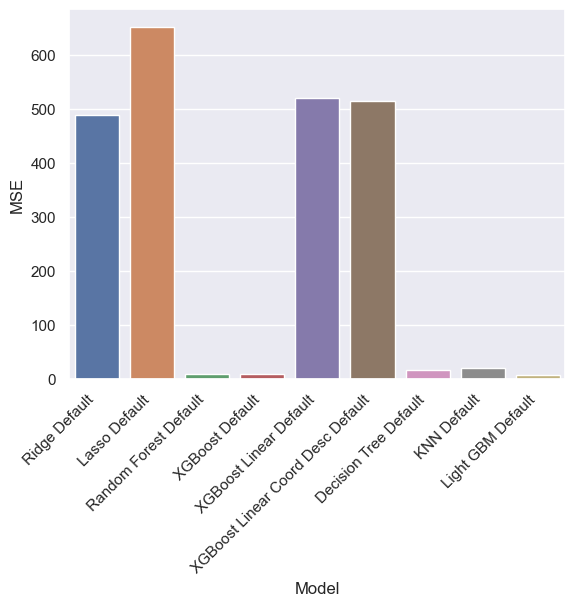

In [47]:
sns.barplot(data=defaults, x='Model', y='MSE')
plt.set(xlabel=None)
plt.ylabel('RMSE', fontsize = 14)
plt.title('Default Model Scores with 10% Train Data', fontsize = 18)
plt.xticks(rotation=45, ha='right')
plt.savefig('../figures/default_10_models.png',dpi=1200, bbox_inches='tight')
plt.show()

Next, to confirm that those with the lowest scores are truly the best, I'll prepare an 80% training data split and make a fresh set of default models, but this time trained with 8 times more data. 

In [ ]:
# Train/test split with new variables for the 80% train splits
X_tr8, X_te8, y_tr8, y_te8 = train_test_split(X_train, y_train, test_size=0.2, random_state=15)

In [ ]:
dummy_mean = DummyRegressor(strategy="mean")
dummy_mean.fit(X_tr8, y_tr8)
y_pred = dummy_mean.predict(X_te8)
train_scores = pd.DataFrame([{'Model' : 'Mean Dummy Regressor', '% Train Data' : 80,\
                              'RMSE' : mean_squared_error(y_te8, y_pred)}])
print(mean_squared_error(y_te8, y_pred))

In [ ]:
dummy_median = DummyRegressor(strategy="median")
dummy_median.fit(X_tr8, y_tr8)
y_pred = dummy_median.predict(X_te8)
new_row = pd.DataFrame([{'Model' : 'Median Dummy Regressor', '% Train Data' : 80, 'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
print(mean_squared_error(y_te8, y_pred))

In [ ]:
ols = LinearRegression()
ols.fit(X_tr8, y_tr8)
y_pred = ols.predict(X_te8)
new_row = pd.DataFrame([{'Model' : 'OLS', '% Train Data' : 80, 'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
print(mean_squared_error(y_te8, y_pred))

In [ ]:
ridge=Ridge(random_state = 15)
ridge.fit(X_tr8, y_tr8)
y_pred = ridge.predict(X_te8)
new_row = pd.DataFrame([{'Model' : 'Ridge Default', '% Train Data' : 80, 'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
print(mean_squared_error(y_te8, y_pred))

In [ ]:
lasso=linear_model.Lasso(random_state = 15)
lasso.fit(X_tr8, y_tr8)
y_pred = lasso.predict(X_te8)
new_row = pd.DataFrame([{'Model' : 'Lasso Default', '% Train Data' : 80, 'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
print(mean_squared_error(y_te8, y_pred))

In [ ]:
forest = RandomForestRegressor(max_depth=10, n_jobs = -1, random_state=15)
forest.fit(X_tr8, y_tr8)
y_pred = forest.predict(X_te8)
new_row = pd.DataFrame([{'Model' : 'Random Forest Default', '% Train Data' : 80, 'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te8, y_pred)

In [ ]:
xgb = XGBRegressor(max_depth=10, seed=15)
xgb.fit(X_tr8, y_tr8)
y_pred = xgb.predict(X_te8)
new_row = pd.DataFrame([{'Model' : 'XGBoost Default', '% Train Data' : 80, 'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te8, y_pred)

In [ ]:
xgb_linear = XGBRegressor(booster = 'gblinear', seed=15)
xgb_linear.fit(X_tr8, y_tr8)
y_pred = xgb_linear.predict(X_te8)
new_row = pd.DataFrame([{'Model' : 'XGBoost Linear Default', '% Train Data' : 80, 'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te8, y_pred)

In [ ]:
xgb_linear_lcd = XGBRegressor(booster = 'gblinear', updater = 'coord_descent', seed=15)
xgb_linear_lcd.fit(X_tr8, y_tr8)
y_pred = xgb_linear_lcd.predict(X_te8)
new_row = pd.DataFrame([{'Model' : 'XGBoost Linear Coord Desc Default', '% Train Data' : 80,\
                         'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te8, y_pred)

In [ ]:
tree = tree.DecisionTreeRegressor(max_depth = 10, random_state = 15)
tree.fit(X_tr8, y_tr8)
y_pred = tree.predict(X_te8)
new_row = pd.DataFrame([{'Model' : 'Decision Tree Default', '% Train Data' : 80, 'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te8, y_pred)

In [ ]:
knn = KNeighborsRegressor(n_jobs = -1)
knn.fit(X_tr8, y_tr8)
y_pred = knn.predict(X_te8)
new_row = pd.DataFrame([{'Model' : 'KNN Default', '% Train Data' : 80, 'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te8, y_pred)

In [ ]:
lgbm = lgb.LGBMRegressor(objective = 'regression', metric = 'rmse', max_depth = 10, data_random_seed = 15)
lgbm.fit(X_tr8, y_tr8)
y_pred = lgbm.predict(X_te8)
new_row = pd.DataFrame([{'Model' : 'Light GBM Default', '% Train Data' : 80, 'RMSE' : mean_squared_error(y_te8, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te8, y_pred)

Now I'll update my graph of model RMSE setting the 10% and 80% train data models next to each other to see if the same trends persist. 

In [ ]:
defaults = train_scores[['Default' in x for x in train_scores['Model'].unique()]]

In [ ]:
sns.barplot(data=defaults, x='Model', y='MSE', hue = '% Train Data')
plt.set(xlabel=None)
plt.ylabel('RMSE', fontsize = 14)
plt.title('Default Model Scores with 10% Train Data', fontsize = 18)
plt.xticks(rotation=45, ha='right')
plt.savefig('../figures/default_80_models.png',dpi=1200, bbox_inches='tight')
plt.show()

Ok, now that I've got an idea of which models are likely to be the best performers I'll go ahead and do some hyperparameter tuning on the top performers using 10% train data.

In [15]:
parameters = {'alpha': sp_randFloat(0.1,100)}
ridge = Ridge(random_state = 15)
ridge_reg = RandomizedSearchCV(ridge, parameters,scoring=['neg_root_mean_squared_error'],\
                               refit='neg_root_mean_squared_error', n_iter=60, cv=5)
random_ridge = ridge_reg.fit(X_tr, y_tr)
random_ridge.best_params_

{'alpha': 0.5444099693120762}

I want to confirm that I'm finding a good spot for the alpha and make sure I don't need to adjust my bounds, so I'm going to plot the alphas against RMSE from the random search, and possible rerun it with a new range. I'll need to call the column names to know which ones I want to plot.

In [16]:
random_ridge_results = pd.DataFrame(random_ridge.cv_results_)
random_ridge_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_neg_root_mean_squared_error',
       'split1_test_neg_root_mean_squared_error',
       'split2_test_neg_root_mean_squared_error',
       'split3_test_neg_root_mean_squared_error',
       'split4_test_neg_root_mean_squared_error',
       'mean_test_neg_root_mean_squared_error',
       'std_test_neg_root_mean_squared_error',
       'rank_test_neg_root_mean_squared_error'],
      dtype='object')

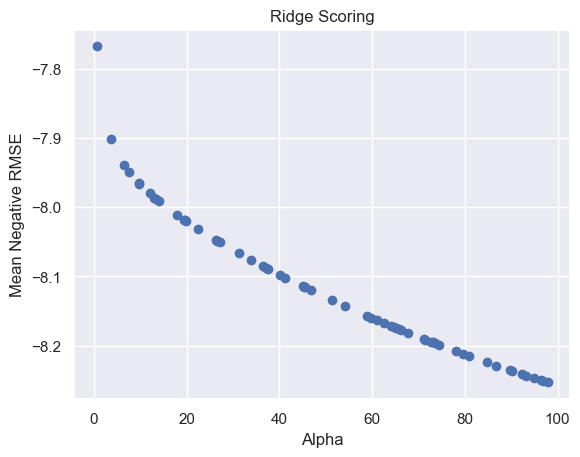

In [17]:
plt.plot(random_ridge_results['param_alpha'], random_ridge_results['mean_test_neg_root_mean_squared_error'], marker='o',\
         linestyle='none')
plt.title('Ridge Scoring')
plt.xlabel('Alpha')
plt.ylabel('Mean Negative RMSE')
plt.show()

So there's not a big change in RMSE, but I definitely want to move to smaller values.

In [18]:
parameters = {'alpha': sp_randFloat(0.001,5)}
ridge = Ridge(random_state = 15)
ridge_reg = RandomizedSearchCV(ridge, parameters,scoring=['neg_root_mean_squared_error'],\
                               refit='neg_root_mean_squared_error', n_iter=60, cv=5)
random_ridge = ridge_reg.fit(X_tr, y_tr)
random_ridge.best_params_

{'alpha': 0.0077743818514870435}

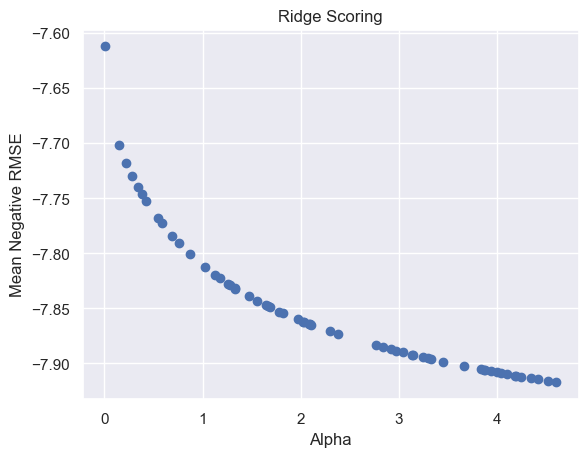

In [19]:
random_ridge_results = pd.DataFrame(random_ridge.cv_results_)
plt.plot(random_ridge_results['param_alpha'], random_ridge_results['mean_test_neg_root_mean_squared_error'], marker='o',\
         linestyle='none')
plt.title('Ridge Scoring')
plt.xlabel('Alpha')
plt.ylabel('Mean Negative RMSE')
plt.show()

That's good enough for right now, let's add this to the results dataframe and move on.

In [20]:
ridge=Ridge(alpha=random_ridge.best_params_['alpha'], random_state = 15)
ridge.fit(X_tr, y_tr)
y_pred = ridge.predict(X_te)
new_row = pd.DataFrame([{'Model' : 'Ridge', '% Train Data' : 10, 'MSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
print(mean_squared_error(y_te, y_pred))

457.7423091028


On to lasso regression.

In [21]:
parameters = {'alpha': sp_randFloat(40,80)}
lasso = linear_model.Lasso(tol = 0.01, random_state = 15)
rand = RandomizedSearchCV(lasso, parameters, scoring=['neg_root_mean_squared_error'],\
                          refit='neg_root_mean_squared_error', n_iter=60, cv=5, random_state=0)
rand_lasso = rand.fit(X_tr, y_tr)
rand_lasso.best_params_

{'alpha': 41.503184034908415}

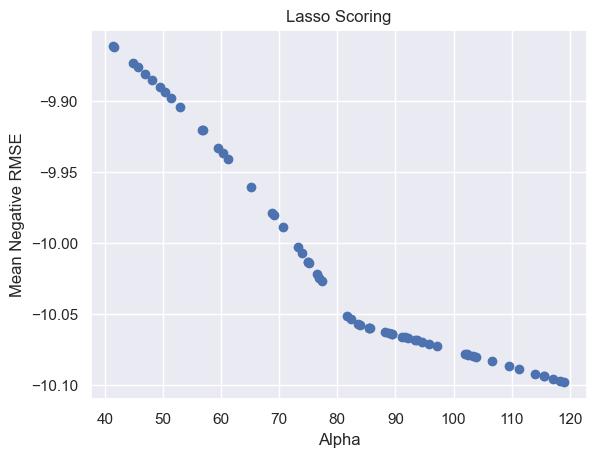

In [22]:
rand_lasso_params = pd.DataFrame(rand_lasso.cv_results_)
plt.plot(rand_lasso_params['param_alpha'], rand_lasso_params['mean_test_neg_root_mean_squared_error'], marker='o',\
         linestyle='none')
plt.title('Lasso Scoring')
plt.xlabel('Alpha')
plt.ylabel('Mean Negative RMSE')
plt.show()

In [23]:
lasso = linear_model.Lasso(alpha=rand_lasso.best_params_['alpha'], random_state = 15)
lasso.fit(X_tr, y_tr)
y_pred = lasso.predict(X_te)
new_row = pd.DataFrame([{'Model' : 'Lasso', '% Train Data' : 10, 'MSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
print(mean_squared_error(y_te, y_pred))

736.5861064872582


C:\Users\zbro1\anaconda\envs\MOF\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.260e+04, tolerance: 8.481e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
parameters = {'max_features': sp_randFloat(0.1, 0.9),
             'max_depth': sp_randInt(3,8),
             'min_samples_leaf': sp_randInt(200,800),
             'n_estimators': sp_randInt(500,1000)
             }
forest = RandomForestRegressor(n_jobs=-1, random_state=15)
forest_reg = RandomizedSearchCV(forest, parameters, scoring='neg_root_mean_squared_error',\
                                refit='neg_root_mean_squared_error', n_iter=10, cv=5, random_state=15)
rand_forest = forest_reg.fit(X_tr, y_tr)
rand_forest.best_params_

In [ ]:
opt_forest = RandomForestRegressor(n_estimators=rand_forest.best_params_['n_estimators'],\
                                   max_features=rand_forest.best_params_['max_features'],\
                                   min_samples_leaf=rand_forest.best_params_['min_samples_leaf'],\
                                   max_depth=rand_forest.best_params_['max_depth'], n_jobs = -1, random_state=15)
opt_forest.fit(X_tr, y_tr)
y_pred = opt_forest.predict(X_te)
new_row = pd.DataFrame([{'Model' : 'Random Forest', '% Train Data' : 10, 'MSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

In [26]:
xgb = XGBRegressor()
parameters = {'n_estimators': sp_randInt(500,1000),
             'max_depth': sp_randInt(2,9),
             'eta': sp_randFloat(0.0001,0.99),
             'colsample_bytree': sp_randFloat(0.01,0.99)} 
rand_xgb = RandomizedSearchCV(xgb, parameters, scoring='neg_root_mean_squared_error',\
                                refit='neg_root_mean_squared_error', n_iter=10, cv=5, random_state=15)
xgbooster = rand_xgb.fit(X_tr, y_tr)
xgbooster.best_params_

KeyboardInterrupt: 

In [ ]:
xgb_model = XGBRegressor(n_estimators=xgbooster.best_params_['n_estimators'],\
                                   eta=xgbooster.best_params_['eta'],\
                                   colsample_bytree=xgbooster.best_params_['colsample_bytree'],\
                                   max_depth=xgbooster.best_params_['max_depth'])
xgb_model.fit(X_tr, y_tr)
y_pred = xgb_model.predict(X_te)
new_row = pd.DataFrame([{'Model' : 'XGBoost', '% Train Data' : 10, 'MSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

In [ ]:
xgb_linear = XGBRegressor(booster = 'gblinear', verbosity = 0)
parameters = {'reg_lambda': sp_randFloat(0,1),
             'reg_alpha': sp_randFloat(0, 1),
             'feature_selector': ['cyclic', 'shuffle']}
rand_xgb_linear = RandomizedSearchCV(xgb_linear, parameters, scoring='neg_root_mean_squared_error',\
                                refit='neg_root_mean_squared_error', n_iter=10, cv=5, random_state=15)
xgbooster_linear = rand_xgb_linear.fit(X_tr, y_tr)
xgbooster_linear.best_params_

In [ ]:
xgb_model_linear = XGBRegressor(booster = 'gblinear', reg_lambda = xgbooster_linear.best_params_['reg_lambda'],\
                                   reg_alpha=xgbooster_linear.best_params_['reg_alpha'],\
                                   feature_selector=xgbooster_linear.best_params_['feature_selector'])
xgb_model_linear.fit(X_tr, y_tr)
y_pred = xgb_model_linear.predict(X_te)
new_row = pd.DataFrame([{'Model' : 'XGBoost Linear', '% Train Data' : 10, 'MSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

In [ ]:
xgb_coord_desc = XGBRegressor(booster = 'gblinear', updater = 'coord_descent', verbosity = 0)
parameters = {'reg_lambda': sp_randFloat(0,1),
             'reg_alpha': sp_randFloat(0, 1),
             'feature_selector': ['random', 'greedy', 'thrifty']}
rand_xgb_cd = RandomizedSearchCV(xgb_coord_desc, parameters, scoring='neg_root_mean_squared_error',\
                                refit='neg_root_mean_squared_error', n_iter=10, cv=5, random_state=15)
xgbooster_linear_cd = rand_xgb_cd.fit(X_tr, y_tr)
xgbooster_linear_cd.best_params_

In [ ]:
xgb_model_lcd = XGBRegressor(booster = 'gblinear', updater = 'coord_descent',\
                                reg_lambda = xgbooster_linear.best_params_['reg_lambda'],\
                                   reg_alpha=xgbooster_linear.best_params_['reg_alpha'],\
                                   feature_selector=xgbooster_linear.best_params_['feature_selector'])
xgb_model_lcd.fit(X_tr, y_tr)
y_pred = xgb_model_lcd.predict(X_te)
new_row = pd.DataFrame([{'Model' : 'XGBoost Linear Coord Desc', '% Train Data' : 10, 'MSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

In [ ]:
d_tree = tree.DecisionTreeRegressor(random_state = 12)
parameters = {'max_depth': sp_randInt(2,8),
             'min_samples_leaf': sp_randInt(100,5000)}
rand_tree = RandomizedSearchCV(d_tree, parameters, scoring='neg_root_mean_squared_error',\
                                refit='neg_root_mean_squared_error', n_iter=10, cv=5, random_state=15)
decision_tree = rand_tree.fit(X_tr, y_tr)
decision_tree.best_params_

In [ ]:
decision_tree_model = tree.DecisionTreeRegressor(max_depth = decision_tree.best_params_['max_depth'],\
                                            min_samples_leaf = decision_tree.best_params_['min_samples_leaf'],\
                                            random_state = 15)
decision_tree_model.fit(X_tr, y_tr)
y_pred = decision_tree_model.predict(X_te)
new_row = pd.DataFrame([{'Model' : 'Decision Tree', '% Train Data' : 10, 'MSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

In [ ]:
neighbors = KNeighborsRegressor()
parameters = {'n_neighbors': sp_randInt(10,100)}
rand_knn = RandomizedSearchCV(neighbors, parameters, scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error'],\
                                refit='neg_root_mean_squared_error', n_iter=10, cv=5, random_state=15)
opt_nn = rand_knn.fit(X_tr, y_tr)
opt_nn.best_params_

In [ ]:
knn_opt = KNeighborsRegressor(n_neighbors = opt_nn.best_params_['n_neighbors'])
knn_opt.fit(X_tr, y_tr)
y_pred = knn_opt.predict(X_te)
new_row = pd.DataFrame([{'Model' : 'KNN', '% Train Data' : 10, 'MSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)

In [ ]:
lgbm = lgb.LGBMRegressor(objective = 'regression', metric = 'mae')
parameters = {'num_leaves': sp_randInt(10,1000),
              'n_estimators': sp_randInt(10,1000),
              'max_depth': sp_randInt(2,10),
              'learning_rate': sp_randFloat(0.001,1)}
rand_lgbm = RandomizedSearchCV(lgbm, parameters, scoring='neg_root_mean_squared_error',\
                                refit='neg_root_mean_squared_error', n_iter=10, cv=5, random_state=15)
opt_lgbm = rand_lgbm.fit(X_tr, y_tr)
opt_lgbm.best_params_

In [ ]:
lgbm_opt = lgb.LGBMRegressor(objective = 'regression', metric = 'mae', num_leaves = opt_lgbm.best_params_['num_leaves'],\
                             n_estimators = opt_lgbm.best_params_['n_estimators'],\
                             max_depth = opt_lgbm.best_params_['max_depth'],\
                             learning_rate = opt_lgbm.best_params_['learning_rate'])
lgbm_opt.fit(X_tr, y_tr)
y_pred = lgbm_opt.predict(X_te)
new_row = pd.DataFrame([{'Model' : 'Light GBM', '% Train Data' : 10, 'MSE' : mean_squared_error(y_te, y_pred)}])
train_scores = pd.concat([train_scores, new_row])
mean_squared_error(y_te, y_pred)